In [1]:
import numpy as np
import torch

# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)



In [2]:
import torch

data_federation = [[x_train, y_train], [x_train, y_train]]

in_layer = len(data_federation[0][0][0])
out_layer = len(data_federation[0][1][0])
optimizer = "SGD"
criterion = "MSELoss"
starting_model = torch.rand(in_layer, out_layer)
epochs = 100
learn_rate = 0.01

In [3]:
# from sail_safe_functions.machine_learning.models.LinearRegression import LinearRegression

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out


In [4]:
model = linearRegression(in_layer, out_layer)

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)

In [5]:
from torch.autograd import Variable

for epoch in range(epochs):

    inputs = Variable(x_train)
    labels = Variable(y_train)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(179.3457, grad_fn=<MseLossBackward0>)
epoch 0, loss 179.3457489013672
tensor(15.0617, grad_fn=<MseLossBackward0>)
epoch 1, loss 15.061685562133789
tensor(1.6567, grad_fn=<MseLossBackward0>)
epoch 2, loss 1.656721830368042
tensor(0.5585, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.5585394501686096
tensor(0.4642, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.4642362892627716
tensor(0.4519, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.4518689215183258
tensor(0.4462, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.44623681902885437
tensor(0.4412, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.4412059783935547
tensor(0.4363, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.43627509474754333
tensor(0.4314, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.4314028024673462
tensor(0.4266, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.42658570408821106
tensor(0.4218, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.4218219816684723
tensor(0.4171, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.4171117842197418
tenso

[[ 0.26288065]
 [ 2.3690324 ]
 [ 4.4751844 ]
 [ 6.5813365 ]
 [ 8.687488  ]
 [10.793639  ]
 [12.899792  ]
 [15.005943  ]
 [17.112095  ]
 [19.218246  ]
 [21.324398  ]]


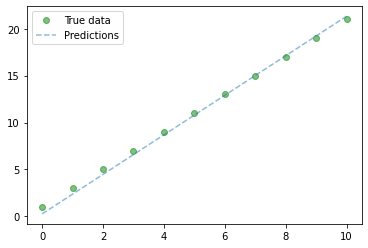

In [6]:
import matplotlib.pyplot as plt

predicted = model(x_train).data.numpy()
print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()